In [1]:
import tensorflow as tf
import os.path
from glob import glob
from tqdm import tqdm
import scipy.misc
import random


import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import numpy as np
import sys

#sys.path.append('vgg16-transfer-learning')

/media/yousof/Volume/SDC/Toolkits/anaconda3/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load categories
with open('categories.txt') as f:
    cont = f.readlines()

cats = [x for x in cont]
print(len(cats))
print(cats[0])

# load labels
truth_text = dict()
truth_idx = dict()
import csv
with open('training_ground_truth.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader, None)  # skip the headers
    for row in reader:
        truth_text[row[0]]=cats[int(row[1])-1]
        truth_idx[row[0]]=int(row[1])-1
        
data_folder = 'training'
image_paths = glob(os.path.join(data_folder, 'training_*.jpg'))
image_shape = (224,224)

print('number of samples', len(image_paths))
print(set(truth_idx.values()))

200
person, individual, someone, somebody, mortal, soul

number of samples 80000
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199}


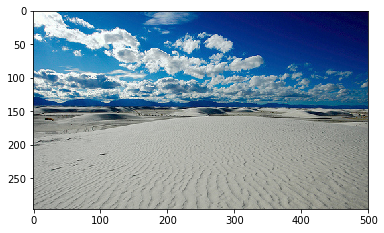

training_04672.jpg truth: sand
 199
training/training_04672.jpg training_04672.jpg


In [3]:
num = random.randint(1,len(image_paths)+1)
img_label = 'training_' + str(num).zfill(5) + '.jpg'
img_path = 'training/'+img_label
img=mpimg.imread(img_path)
plt.imshow(img)
plt.show()
print(img_label, 'truth:', truth_text[img_label], truth_idx[img_label])
print(img_path,os.path.basename(img_path))

## VGG16 (from Keras)
load it and test it

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import decode_predictions

vgg_net = tf.keras.applications.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

img_r = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img_r)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred = vgg_net.predict(x)

idx = np.argmax(pred)
val = pred[0,idx]
print(val, 'at', idx)
decode_predictions(pred)

# my VGG16

In [ ]:
print(type(image_paths))
random.shuffle(image_paths)
image_file = image_paths[0]
print(image_file)
gt_this = truth_idx[os.path.basename(image_file)]
image = resize(imageio.imread(image_file), image_shape)

np.array(gt_this)
print(truth_text[os.path.basename(image_file)])
#print(np.array(image))

In [ ]:
!echo 'xdg-open {image_paths[0]}'

In [ ]:
n_classes = 200
learning_rate = 0.001
init_std= 0.01

In [ ]:
# https://arxiv.org/pdf/1409.1556.pdf
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=(None, 224, 224,3), name = 'inputImage')
x1 = x-tf.constant(0.5,tf.float32)
######
conv1_1 = tf.layers.conv2d(x1,64,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer(stddev=0.5),
                           name="conv1_1")
conv1_2 = tf.layers.conv2d(conv1_1,64,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer,
                           name="conv1_2")
pool1 = tf.layers.max_pooling2d(conv1_2, (2,2), (2,2), padding='same',name = "pool1")

######
conv2_1 = tf.layers.conv2d(pool1,128,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                           name="conv2_1")
conv2_2 = tf.layers.conv2d(conv2_1,128,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                           name="conv2_2")
pool2 = tf.layers.max_pooling2d(conv2_2, (2,2), (2,2), padding='same',name = "pool2")

######
conv3_1 = tf.layers.conv2d(pool2,256,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                           name="conv3_1")
conv3_2 = tf.layers.conv2d(conv3_1,256,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                           name="conv3_2")
conv3_3 = tf.layers.conv2d(conv3_2,256,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                           name="conv3_3")
pool3 = tf.layers.max_pooling2d(conv3_3, (2,2), (2,2), padding='same',name = "pool3")

######
conv4_1 = tf.layers.conv2d(pool3,512,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                           name="conv4_1")
conv4_2 = tf.layers.conv2d(conv4_1,512,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                           name="conv4_2")
conv4_3 = tf.layers.conv2d(conv4_2,512,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                           name="conv4_3")
pool4 = tf.layers.max_pooling2d(conv4_3, (2,2), (2,2), padding='same',name = "pool4")

####

conv5_1 = tf.layers.conv2d(pool4,512,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                           name="conv5_1")
conv5_2 = tf.layers.conv2d(conv5_1,512,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                           name="conv5_2")
conv5_3 = tf.layers.conv2d(conv5_2,512,(3,3),strides=(1,1),
                           padding='same', activation=tf.nn.relu,
                           kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                           name="conv5_3")
pool5 = tf.layers.max_pooling2d(conv5_3, (2,2), (2,2), padding='same',name = "pool5")

unrolled = tf.layers.flatten(pool5, name = "unrolled")

####

fc6 = tf.layers.dense(unrolled, 4096,activation=tf.nn.relu,
                      kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                      name = "fc6")

fc7 = tf.layers.dense(fc6, 4096,activation=tf.nn.relu,
                      kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                      name ="fc7")


fc8 = tf.layers.dense(fc7, n_classes,
                      kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                      name ="fc8")

prob = tf.nn.softmax(fc8, name="prob")

## optimization and cost ops
label = tf.placeholder(tf.int32, shape=(None),name = 'label')
#one_hot_y = tf.one_hot(label, n_classes,name='onehot_output')

loss = tf.losses.sparse_softmax_cross_entropy(logits=fc8, labels=label)
tf.summary.scalar('loss', loss)
optimiser = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimiser.minimize(loss)

In [ ]:
## tensor board
with tf.Session() as sess:
    merged = tf.summary.merge_all()
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    writer = tf.summary.FileWriter('./TFlog', tf.get_default_graph())

In [ ]:
from scipy.misc import imread
#from imageio import imread
from skimage.transform import resize
#import imageio

def get_batches_fn(batch_size):
    """
    Create batches of training data
    :param batch_size: Batch Size
    :return: Batches of training data
    """
    data_folder = 'training'
    image_paths = glob(os.path.join(data_folder, 'training_*.jpg'))
    image_shape = (224,224)

    #print(len(image_paths))
    random.shuffle(image_paths)
    for batch_i in range(0, len(image_paths), batch_size):
        images = []
        gt = []
        for image_file in image_paths[batch_i:batch_i+batch_size]:
            gt_this = truth_idx[os.path.basename(image_file)]
            image = resize(imread(image_file,mode='RGB'), image_shape)
            if(len(image.shape) != 3):
                print(image_file,len(image.shape))
            images.append(image)
            gt.append(gt_this)
            
        try:
            qt_np = np.array(gt)
            im_np = np.array(images)
        except ValueError as v:
            print([x.shape for x in images])
            
            sys.exit(str(v))
        #print(im_np.shape,qt_np.shape)
        yield im_np, qt_np

In [ ]:
batch_size = 10
epochs = 1

with tf.Session() as sess:
    merged = tf.summary.merge_all()
    sess.run(tf.global_variables_initializer())
    #sess.run(tf.local_variables_initializer())
    writer = tf.summary.FileWriter('./TFlog', tf.get_default_graph())
    target = [training_operation, loss,merged,label,x1,fc8] # , merged
    
    idx = 0
    for i in range(epochs):#tqdm(range(epochs))
        batch_index = 0
        #te = tqdm(get_batches_fn(batch_size))
        for batch_x, batch_y in get_batches_fn(batch_size):
            batch_index += 1
            feed_dict = {x: batch_x, label: batch_y}
            out = sess.run(target, feed_dict = feed_dict)
            #te.set_description('Loss %g' % out[2])
            writer.add_summary(out[2],idx)
            idx = idx +1
            print("Epoch: {} batch: {} loss: {}"
                  .format(i+1,batch_index,out[1]))
        print("===================================================")

takes hell amount of time to train from scratch so lets start with the pretrained model

# transfer learning from pretrained VGG16

In [4]:
preprocess_input =  tf.keras.applications.vgg16.preprocess_input
decode_predictions =  tf.keras.applications.resnet50.decode_predictions

In [5]:
tf.reset_default_graph()
tf.keras.backend.clear_session()

n_classes = 200
init_std = 0.01
learning_rate = 0.001
target_shape = (224,224,3)

vgg_net = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=target_shape,
    pooling=None,
    classes=n_classes
)

input1 = tf.get_default_graph().get_tensor_by_name("input_1:0")

block5_pool = tf.get_default_graph().get_tensor_by_name("block5_pool/MaxPool:0")

unrolled = tf.layers.flatten(block5_pool)
with tf.variable_scope("I_want_to_train_only_these"):
    fc6 = tf.layers.dense(unrolled, 4096,activation=tf.nn.relu, 
                          kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                          name = "fc6")
    fc7 = tf.layers.dense(fc6, 4096,activation=tf.nn.relu,
                          kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                          name ="fc7")
    fc8 = tf.layers.dense(fc7, n_classes,
                          kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                          name ="fc8")

prob = tf.nn.softmax(fc8, name="prob")

updatable_variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='I_want_to_train_only_these')

# ## optimization and cost ops
label = tf.placeholder(tf.int32, shape=(None),name = 'label')
#one_hot_y = tf.one_hot(label, n_classes,name='onehot_output')

loss = tf.losses.sparse_softmax_cross_entropy(logits=fc8, labels=label)
tf.summary.scalar('loss', loss)
optimiser = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimiser.minimize(loss,var_list=updatable_variables)

In [8]:
def get_batches_fn(batch_size):
    """
    Create batches of training data
    :param batch_size: Batch Size
    :return: Batches of training data
    """
    data_folder = 'training'
    image_paths = glob(os.path.join(data_folder, 'training_*.jpg'))
    image_shape = (224,224)

    #print(len(image_paths))
    random.shuffle(image_paths)
    for batch_i in range(0, len(image_paths), batch_size):
        images = []
        gt = []
        for image_file in image_paths[batch_i:batch_i+batch_size]:
            gt_this = truth_idx[os.path.basename(image_file)]
            img_r = tf.keras.preprocessing.image.load_img(img_path, target_size=image_shape)
            img_r = tf.keras.preprocessing.image.img_to_array(img_r)
            img_r = preprocess_input(img_r)
            images.append(img_r)
            gt.append(gt_this)
            
        try:
            qt_np = np.array(gt)
            im_np = np.array(images)
        except ValueError as v:
            print([x.shape for x in images])
            sys.exit(str(v))
        yield im_np, qt_np

In [ ]:
batch_size = 50
epochs = 1

with tf.Session() as sess:
    merged = tf.summary.merge_all()
    sess.run(tf.global_variables_initializer())
    #sess.run(tf.local_variables_initializer())
    writer = tf.summary.FileWriter('./TFlog', tf.get_default_graph())
    target = [training_operation, loss,merged] # , merged
    
    idx = 0
    for i in range(epochs):#tqdm(range(epochs))
        batch_index = 0
        for batch_x, batch_y in get_batches_fn(batch_size):
            batch_index += 1
            feed_dict = {input1: batch_x, label: batch_y}
            out = sess.run(target, feed_dict = feed_dict)
            writer.add_summary(out[2],idx)
            idx = idx +1
            print("Epoch: {} batch: {} loss: {}"
                  .format(i+1,batch_index,out[1]))
        print("===================================================")

Epoch: 1 batch: 1 loss: 5.300707817077637
Epoch: 1 batch: 2 loss: 14.47482681274414
Epoch: 1 batch: 3 loss: 6.188167572021484
Epoch: 1 batch: 4 loss: 5.314163684844971
Epoch: 1 batch: 5 loss: 5.2694783210754395
Epoch: 1 batch: 6 loss: 5.325727462768555
Epoch: 1 batch: 7 loss: 5.28024435043335
Epoch: 1 batch: 8 loss: 5.357058525085449
Epoch: 1 batch: 9 loss: 5.304401397705078
Epoch: 1 batch: 10 loss: 5.280872344970703
Epoch: 1 batch: 11 loss: 5.305797100067139
Epoch: 1 batch: 12 loss: 5.306933403015137
Epoch: 1 batch: 13 loss: 5.306581974029541
Epoch: 1 batch: 14 loss: 5.295637607574463
Epoch: 1 batch: 15 loss: 5.297314643859863
Epoch: 1 batch: 16 loss: 5.294694423675537
Epoch: 1 batch: 17 loss: 5.301411151885986
Epoch: 1 batch: 18 loss: 5.2969584465026855
Epoch: 1 batch: 19 loss: 5.296759128570557
Epoch: 1 batch: 20 loss: 5.293527126312256
Epoch: 1 batch: 21 loss: 5.300260066986084
Epoch: 1 batch: 22 loss: 5.298809051513672
Epoch: 1 batch: 23 loss: 5.295584201812744
Epoch: 1 batch: 24 

Epoch: 1 batch: 190 loss: 5.29638671875
Epoch: 1 batch: 191 loss: 5.297729015350342
Epoch: 1 batch: 192 loss: 5.301395416259766
Epoch: 1 batch: 193 loss: 5.2980146408081055
Epoch: 1 batch: 194 loss: 5.300743579864502
Epoch: 1 batch: 195 loss: 5.296596050262451
Epoch: 1 batch: 196 loss: 5.297369003295898
Epoch: 1 batch: 197 loss: 5.297158241271973
Epoch: 1 batch: 198 loss: 5.3032121658325195
Epoch: 1 batch: 199 loss: 5.298738956451416
Epoch: 1 batch: 200 loss: 5.299304008483887
Epoch: 1 batch: 201 loss: 5.299660682678223
Epoch: 1 batch: 202 loss: 5.298145771026611
Epoch: 1 batch: 203 loss: 5.294022083282471
Epoch: 1 batch: 204 loss: 5.298672676086426
Epoch: 1 batch: 205 loss: 5.298303127288818
Epoch: 1 batch: 206 loss: 5.299538612365723
Epoch: 1 batch: 207 loss: 5.296365737915039
Epoch: 1 batch: 208 loss: 5.29861307144165
Epoch: 1 batch: 209 loss: 5.298886775970459
Epoch: 1 batch: 210 loss: 5.30067253112793
Epoch: 1 batch: 211 loss: 5.298557281494141
Epoch: 1 batch: 212 loss: 5.30062723

Epoch: 1 batch: 377 loss: 5.296717643737793
Epoch: 1 batch: 378 loss: 5.299217700958252
Epoch: 1 batch: 379 loss: 5.299477577209473
Epoch: 1 batch: 380 loss: 5.298243522644043
Epoch: 1 batch: 381 loss: 5.295944690704346
Epoch: 1 batch: 382 loss: 5.304052352905273
Epoch: 1 batch: 383 loss: 5.296471118927002
Epoch: 1 batch: 384 loss: 5.301607608795166
Epoch: 1 batch: 385 loss: 5.299283504486084
Epoch: 1 batch: 386 loss: 5.293592929840088
Epoch: 1 batch: 387 loss: 5.302204132080078
Epoch: 1 batch: 388 loss: 5.297961235046387
Epoch: 1 batch: 389 loss: 5.299217700958252
Epoch: 1 batch: 390 loss: 5.302606582641602
Epoch: 1 batch: 391 loss: 5.298790454864502
Epoch: 1 batch: 392 loss: 5.302114486694336
Epoch: 1 batch: 393 loss: 5.300042629241943
Epoch: 1 batch: 394 loss: 5.2961745262146
Epoch: 1 batch: 395 loss: 5.298933029174805
Epoch: 1 batch: 396 loss: 5.295411586761475
Epoch: 1 batch: 397 loss: 5.300500392913818
Epoch: 1 batch: 398 loss: 5.303279876708984
Epoch: 1 batch: 399 loss: 5.299333

Epoch: 1 batch: 564 loss: 5.299044132232666
Epoch: 1 batch: 565 loss: 5.302947998046875
Epoch: 1 batch: 566 loss: 5.295321464538574
Epoch: 1 batch: 567 loss: 5.299800872802734
Epoch: 1 batch: 568 loss: 5.297402381896973
Epoch: 1 batch: 569 loss: 5.300573825836182
Epoch: 1 batch: 570 loss: 5.299374580383301
Epoch: 1 batch: 571 loss: 5.300079345703125
Epoch: 1 batch: 572 loss: 5.3010783195495605
Epoch: 1 batch: 573 loss: 5.304711818695068
Epoch: 1 batch: 574 loss: 5.299890041351318
Epoch: 1 batch: 575 loss: 5.298662185668945
Epoch: 1 batch: 576 loss: 5.302497386932373
Epoch: 1 batch: 577 loss: 5.293278694152832
Epoch: 1 batch: 578 loss: 5.297723770141602
Epoch: 1 batch: 579 loss: 5.30093240737915
Epoch: 1 batch: 580 loss: 5.300714492797852
Epoch: 1 batch: 581 loss: 5.300347328186035
Epoch: 1 batch: 582 loss: 5.298812389373779
Epoch: 1 batch: 583 loss: 5.300334453582764
Epoch: 1 batch: 584 loss: 5.2966461181640625
Epoch: 1 batch: 585 loss: 5.297842025756836
Epoch: 1 batch: 586 loss: 5.301

Epoch: 1 batch: 751 loss: 5.303037166595459
Epoch: 1 batch: 752 loss: 5.300332069396973
Epoch: 1 batch: 753 loss: 5.303732872009277
Epoch: 1 batch: 754 loss: 5.295421123504639
Epoch: 1 batch: 755 loss: 5.301882743835449
Epoch: 1 batch: 756 loss: 5.297152042388916
Epoch: 1 batch: 757 loss: 5.296667575836182
Epoch: 1 batch: 758 loss: 5.300631046295166
Epoch: 1 batch: 759 loss: 5.299456596374512
Epoch: 1 batch: 760 loss: 5.299338340759277
Epoch: 1 batch: 761 loss: 5.30029296875
Epoch: 1 batch: 762 loss: 5.298704147338867
Epoch: 1 batch: 763 loss: 5.301198959350586
Epoch: 1 batch: 764 loss: 5.299863338470459
Epoch: 1 batch: 765 loss: 5.3004231452941895
Epoch: 1 batch: 766 loss: 5.296770095825195
Epoch: 1 batch: 767 loss: 5.300190448760986
Epoch: 1 batch: 768 loss: 5.297428131103516
Epoch: 1 batch: 769 loss: 5.295277118682861
Epoch: 1 batch: 770 loss: 5.298077583312988
Epoch: 1 batch: 771 loss: 5.3006978034973145
Epoch: 1 batch: 772 loss: 5.2984113693237305
Epoch: 1 batch: 773 loss: 5.29833

Epoch: 1 batch: 938 loss: 5.3019938468933105
Epoch: 1 batch: 939 loss: 5.298160552978516
Epoch: 1 batch: 940 loss: 5.296281814575195
Epoch: 1 batch: 941 loss: 5.304049015045166
Epoch: 1 batch: 942 loss: 5.300504207611084
Epoch: 1 batch: 943 loss: 5.301250457763672
Epoch: 1 batch: 944 loss: 5.300310134887695
Epoch: 1 batch: 945 loss: 5.299062728881836
Epoch: 1 batch: 946 loss: 5.298326015472412
Epoch: 1 batch: 947 loss: 5.301738262176514
Epoch: 1 batch: 948 loss: 5.299768447875977
Epoch: 1 batch: 949 loss: 5.303864002227783
Epoch: 1 batch: 950 loss: 5.298385143280029
Epoch: 1 batch: 951 loss: 5.301018714904785
Epoch: 1 batch: 952 loss: 5.293982028961182
Epoch: 1 batch: 953 loss: 5.297122955322266
Epoch: 1 batch: 954 loss: 5.2985310554504395
Epoch: 1 batch: 955 loss: 5.301008224487305
Epoch: 1 batch: 956 loss: 5.298696517944336
Epoch: 1 batch: 957 loss: 5.298407077789307
Epoch: 1 batch: 958 loss: 5.303133487701416
Epoch: 1 batch: 959 loss: 5.3010454177856445
Epoch: 1 batch: 960 loss: 5.3

Epoch: 1 batch: 1122 loss: 5.30131721496582
Epoch: 1 batch: 1123 loss: 5.297047138214111
Epoch: 1 batch: 1124 loss: 5.298755645751953
Epoch: 1 batch: 1125 loss: 5.300499439239502
Epoch: 1 batch: 1126 loss: 5.299015045166016
Epoch: 1 batch: 1127 loss: 5.298255443572998
Epoch: 1 batch: 1128 loss: 5.303318977355957
Epoch: 1 batch: 1129 loss: 5.30001974105835
Epoch: 1 batch: 1130 loss: 5.299252986907959


In [ ]:
## tensor board
with tf.Session() as sess:
    merged = tf.summary.merge_all()
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    writer = tf.summary.FileWriter('./TFlog', tf.get_default_graph())

In [ ]:
tf.keras.preprocessing.image.load_img??